In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv("./pluto_rodent_merged.csv")

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_merge = df.copy(deep=True)


In [5]:
data_merge.shape

(2294210, 45)

# BUILDING CLASS

In [6]:
data_merge["bldgclass"].isnull().sum()

841

In [7]:
data_merge['bldgclass'] = data_merge['bldgclass'].astype(str).str[0]


In [8]:
data_merge.loc[(data_merge["bldgclass"]=='n'), "bldgclass"] = np.nan

In [9]:
data_merge["bldgclass"].isnull().sum()

841

In [10]:
data_merge["bldgclass"].value_counts()

C    895166
B    368391
D    258609
A    172817
S    129013
K     98848
V     71248
G     49412
R     45188
Q     42327
O     34833
M     31352
W     20558
E     12659
H     12189
Z      9747
I      9214
N      7507
F      7309
P      6020
U      5614
Y      2912
J      1608
T       828
Name: bldgclass, dtype: int64

# LAND USE CATEGORY

In [11]:
data_merge["landuse"].isnull().sum()

7327

In [12]:
data_merge["landuse"].value_counts()

2.0     748687
1.0     541766
4.0     417380
3.0     193498
5.0     116262
8.0      80286
11.0     71248
9.0      42854
10.0     36638
6.0      19989
7.0      18275
Name: landuse, dtype: int64

In [13]:
data_merge['landuse'] = pd.Categorical(data_merge.landuse)
data_merge['landuse'] = data_merge['landuse'].cat.rename_categories(["One & Two Family Buildings","Multi-Family Walk-Up Buildings","Multi-Family Elevator Buildings","Mixed Residential & Commercial Buildings","Commercial & Office Buildings","Industrial & Manufacturing","Transportation & Utility","Public Facilities & Institutions","Open Space & Outdoor Recreation","Parking Facilities","Vacant Land"])

In [14]:
data_merge["landuse"].value_counts()

Multi-Family Walk-Up Buildings              748687
One & Two Family Buildings                  541766
Mixed Residential & Commercial Buildings    417380
Multi-Family Elevator Buildings             193498
Commercial & Office Buildings               116262
Public Facilities & Institutions             80286
Vacant Land                                  71248
Open Space & Outdoor Recreation              42854
Parking Facilities                           36638
Industrial & Manufacturing                   19989
Transportation & Utility                     18275
Name: landuse, dtype: int64

# LOT AREA

In [15]:
data_merge["lotarea"].isnull().sum()

845

In [16]:
data_merge.loc[(data_merge["lotarea"]==0), "lotarea"] = np.nan

In [17]:
data_merge["lotarea"].isnull().sum()

1399

In [18]:
print("\n The min is: ", data_merge["lotarea"].min() , '\n',\
      "The max is: ", data_merge["lotarea"].max(), '\n',\
      "The average is: ", data_merge["lotarea"].mean(),'\n',\
     "The std is: ", data_merge["lotarea"].std(),'\n',\
     "The std is: ", data_merge["lotarea"].skew())


 The min is:  1.0 
 The max is:  36589999.0 
 The average is:  12964.054077287661 
 The std is:  213418.11881008607 
 The std is:  105.57045815679095


<AxesSubplot:>

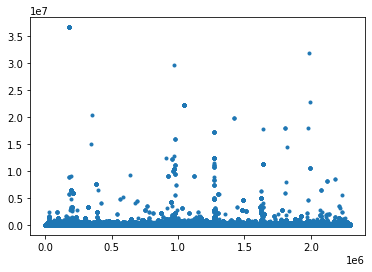

In [19]:
data_merge["lotarea"].plot(style='.')

<AxesSubplot:>

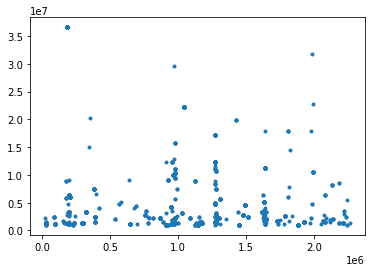

In [20]:
data_merge["lotarea"].loc[data_merge["lotarea"] >= 1000000].plot(style='.')

In [21]:
print("The quantile is \t", data_merge["lotarea"].loc[data_merge["lotarea"] < 1000000 ].quantile(0.25) ,\
     '\t', data_merge["lotarea"].loc[data_merge["lotarea"] < 1000000 ].quantile(0.50), \
     '\t', data_merge["lotarea"].loc[data_merge["lotarea"] < 1000000 ].quantile(0.75))

The quantile is 	 2000.0 	 2522.0 	 5361.0


In [22]:
data_merge['lotarea'].value_counts(bins = [1,2000,2522,5361,1000000,36590000], sort = False)

(0.999, 2000.0]            623709
(2000.0, 2522.0]           531694
(2522.0, 5361.0]           562786
(5361.0, 1000000.0]        572628
(1000000.0, 36590000.0]      1994
Name: lotarea, dtype: int64

In [23]:
bins = [1,2000,2522,5361,1000000,36590000]
data_merge['lotarea'] = pd.cut(data_merge['lotarea'], bins, labels=["lot_area_1","lot_area_2","lot_area_3","lot_area_4","lot_area_5"])

In [24]:
data_merge['lotarea'].value_counts()

lot_area_1    623669
lot_area_4    572628
lot_area_3    562786
lot_area_2    531694
lot_area_5      1994
Name: lotarea, dtype: int64

# NUMBER OF BUILDINGS

In [25]:
data_merge["numbldgs"].isnull().sum()

845

In [26]:
data_merge.loc[(data_merge["numbldgs"]==1849.0)]

,Unnamed: 0,borough,block,lot,bldgclass,landuse,lotarea,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,proxcode,lottype,bsmtcode,assesstot,yearbuilt,yearalter1,yearalter2,histdist,landmark,borocode,bbl,xcoord,ycoord,latitude,longitude,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
954649,954649,QN,16350,400,A,One & Two Family Buildings,lot_area_5,1849.0,1.0,1887.0,1906.0,2798.0,997.0,1.0,5.0,5.0,20311239.0,1938.0,0.0,0.0,NaN,NaN,4,4.163500e+09,1006277.0,142173.0,40.55688,-73.920731,Initial,11497032,PC7335099,1,4.163500e+09,134,CROSS BAY BOULEVARD,11693.0,1033884.0,163172.0,40.614402,-73.821231,Queens,2010-01-20 16:25:20,Failed for Other R,2010-01-26 15:49:13,"(40.614402219567, -73.82123091062)"
954650,954650,QN,16350,400,A,One & Two Family Buildings,lot_area_5,1849.0,1.0,1887.0,1906.0,2798.0,997.0,1.0,5.0,5.0,20311239.0,1938.0,0.0,0.0,NaN,NaN,4,4.163500e+09,1006277.0,142173.0,40.55688,-73.920731,Initial,11498188,PC7340431,1,4.163500e+09,29,BEACH 222 STREET,11697.0,1003637.0,141574.0,40.555236,-73.930234,Queens,2010-02-17 13:50:00,Passed,2010-02-22 12:05:23,"(40.555235813879, -73.930233648499)"
954651,954651,QN,16350,400,A,One & Two Family Buildings,lot_area_5,1849.0,1.0,1887.0,1906.0,2798.0,997.0,1.0,5.0,5.0,20311239.0,1938.0,0.0,0.0,NaN,NaN,4,4.163500e+09,1006277.0,142173.0,40.55688,-73.920731,Initial,11454392,PC7404278,1,4.163500e+09,3,LINCOLN WALK,11697.0,1006382.0,142684.0,40.558276,-73.920352,Queens,2019-03-14 14:50:05,Passed,2019-03-22 11:26:25,"(40.558276079992, -73.920351809128)"
954652,954652,QN,16350,400,A,One & Two Family Buildings,lot_area_5,1849.0,1.0,1887.0,1906.0,2798.0,997.0,1.0,5.0,5.0,20311239.0,1938.0,0.0,0.0,NaN,NaN,4,4.163500e+09,1006277.0,142173.0,40.55688,-73.920731,Initial,11484188,PC7419546,1,4.163500e+09,484,SEABREEZE WALK,11697.0,1005645.0,143154.0,40.559568,-73.923003,Queens,2014-12-11 08:00:57,Passed,2014-12-16 09:39:55,"(40.559567946767, -73.923002615833)"


In [27]:
print("\n The min is: ", data_merge["numbldgs"].min() , '\n',\
      "The max is: ", data_merge["numbldgs"].max(), '\n',\
      "The average is: ", data_merge["numbldgs"].mean(),'\n',\
     "The std is: ", data_merge["numbldgs"].std(),'\n',\
     "The std is: ", data_merge["numbldgs"].skew())


 The min is:  0.0 
 The max is:  1849.0 
 The average is:  1.1781731211560305 
 The std is:  3.3251411849649775 
 The std is:  318.25927659733514


<AxesSubplot:>

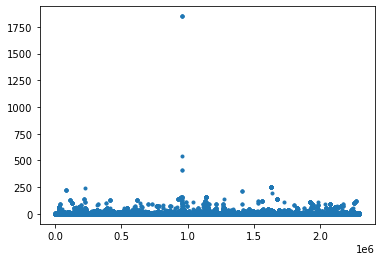

In [28]:
data_merge["numbldgs"].plot(style='.')

In [29]:
data_merge['numbldgs'].value_counts( sort = False)

0.0      112504
92.0         20
142.0         1
105.0         4
47.0          8
          ...  
68.0          4
73.0         37
35.0         21
37.0         88
161.0         3
Name: numbldgs, Length: 119, dtype: int64

In [30]:
print("The quantile is \t", data_merge["numbldgs"].loc[data_merge["numbldgs"] < 1000000 ].quantile(0.25) ,\
     '\t', data_merge["numbldgs"].loc[data_merge["numbldgs"] < 1000000 ].quantile(0.50), \
     '\t', data_merge["numbldgs"].loc[data_merge["numbldgs"] < 1000000 ].quantile(0.75))

The quantile is 	 1.0 	 1.0 	 1.0


In [31]:
data_merge["numbldgs"].loc[((data_merge["numbldgs"] < 50)  &  (data_merge["numbldgs"] >0))].value_counts( sort = False)

47.0          8
16.0        208
2.0      198634
14.0        417
36.0         34
15.0        218
40.0          5
26.0        134
21.0         49
39.0        231
29.0         34
3.0       22045
13.0        411
43.0         36
24.0        109
11.0       1075
22.0         47
19.0        187
6.0        3214
44.0          1
5.0        4088
30.0         79
38.0         20
46.0         61
18.0        230
33.0         17
9.0        1130
48.0         21
25.0         19
7.0        2111
4.0        9672
23.0         56
12.0        593
8.0        1812
42.0          3
41.0          9
27.0         37
1.0     1930935
32.0         46
28.0        203
45.0          6
10.0       1082
31.0         12
20.0        249
17.0        359
34.0         19
35.0         21
37.0         88
Name: numbldgs, dtype: int64

In [32]:
#data_merge['numbldgs'] = df['numbldgs']

In [33]:
# [1, 2)         1930935
# [2, 5)          230351
# [0, 1)          112504
# [5, 10)          12355
# [10, 100)         6994
# [100, 1850)        226
bins = [0,1,2,5,10,100,1850 ]
data_merge['numbldgs'] = pd.cut(data_merge['numbldgs'], bins, \
        right = False, include_lowest=True, \
        labels = ["0building","1building","2-4builidngs","5-9building","10-99building","100-1849building"])

In [34]:
data_merge['numbldgs'].value_counts()

1building           1930935
2-4builidngs         230351
0building            112504
5-9building           12355
10-99building          6994
100-1849building        226
Name: numbldgs, dtype: int64

# NUMBER OF FLOORS

In [35]:
data_merge["numfloors"].isnull().sum()

150563

In [36]:
data_merge["numfloors"].value_counts()

2.00     490663
3.00     487419
5.00     328358
4.00     262886
6.00     227822
          ...  
6.30          1
1.76          1
2.40          1
74.00         1
0.00          1
Name: numfloors, Length: 143, dtype: int64

In [37]:
(data_merge["numfloors"]==0).sum()

1

In [38]:
data_merge.loc[data_merge["numfloors"]==0]

,Unnamed: 0,borough,block,lot,bldgclass,landuse,lotarea,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,proxcode,lottype,bsmtcode,assesstot,yearbuilt,yearalter1,yearalter2,histdist,landmark,borocode,bbl,xcoord,ycoord,latitude,longitude,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
256545,256545,BX,4250,41,Z,NaN,lot_area_4,1building,0.0,0.0,1.0,50.0,119.0,0.0,5.0,0.0,81000.0,1995.0,0.0,0.0,NaN,NaN,2,2.042500e+09,1031136.0,250703.0,40.854672,-73.830515,Initial,12603386,PC6870240,1,2.042500e+09,2119,ST PAUL AVENUE,10461.0,1031137.0,250703.0,40.854484,-73.830083,Bronx,2019-04-24 12:30:41,Passed,2019-04-30 14:34:04,"(40.854484054838, -73.830083031827)"


In [39]:
# If the NUMBER OF FLOORS is null and the NUMBER OF BUILDINGS is greater than zero,
#  then NUMBER OF FLOORS is not available for the tax lot.
data_merge.loc[(data_merge["numfloors"]==0), "numfloors"] = np.nan

In [40]:
(data_merge["numfloors"]<2).sum()

120800

In [41]:
print("\n The min is: ", data_merge["numfloors"].min() , '\n',\
      "The max is: ", data_merge["numfloors"].max(), '\n',\
      "The average is: ", data_merge["numfloors"].mean(),'\n',\
     "The std is: ", data_merge["numfloors"].std(),'\n',\
     "The std is: ", data_merge["numfloors"].skew())


 The min is:  1.0 
 The max is:  104.0 
 The average is:  4.114677852593152 
 The std is:  3.619529498822693 
 The std is:  5.73597926859162


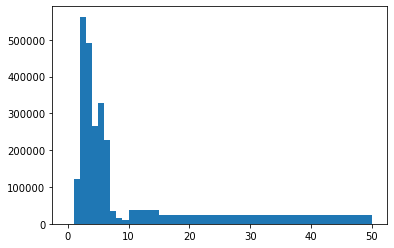

In [42]:
plt.hist(data_merge["numfloors"],bins = [0,1, 2,3,4,5,6,7,8,9,10,15,20,50]) #[1, 2)
plt.show()

In [43]:
#data_merge['numfloors'] = df['numfloors']

In [44]:
bins = [0,1, 2,3,5,10,50,105]  
data_merge['numfloors'] = pd.cut(data_merge['numfloors'], bins, right = True, include_lowest=True,\
                                 labels =["1floor","2floor","3floor","4-5floor","6-10floor","11-50floor",">50floor"])

In [45]:
data_merge['numfloors'].value_counts()

4-5floor      599293
3floor        559442
2floor        499998
6-10floor     296210
1floor        111465
11-50floor     76569
>50floor         669
Name: numfloors, dtype: int64

# TOTAL UNITS

In [46]:
#data_merge['unitstotal']= df['unitstotal']

In [47]:
data_merge['unitstotal'].isnull().sum()

873

In [48]:
data_merge['unitstotal'].value_counts()

2.0       421182
1.0       305703
3.0       281456
0.0       154064
4.0       107731
           ...  
539.0          1
639.0          1
2995.0         1
953.0          1
802.0          1
Name: unitstotal, Length: 746, dtype: int64

In [49]:
data_merge['unitstotal'].max()

10948.0

<AxesSubplot:>

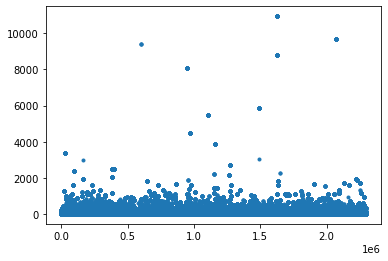

In [50]:
data_merge["unitstotal"].plot(style='.')

<AxesSubplot:>

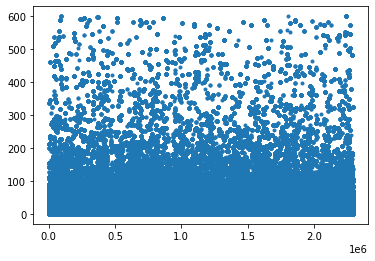

In [51]:
data_merge["unitstotal"].loc[data_merge["unitstotal"] <= 600].plot(style='.')

In [52]:
print("The quantile is \t", data_merge["unitstotal"].loc[data_merge["unitstotal"] >0 ].quantile(0.25) ,\
     '\t', data_merge["unitstotal"].loc[data_merge["unitstotal"] >0 ].quantile(0.50), \
     '\t', data_merge["unitstotal"].loc[data_merge["unitstotal"] >0 ].quantile(0.75))

The quantile is 	 2.0 	 4.0 	 17.0


In [53]:
bins = [0,2, 4,17,600,10948]  
data_merge['unitstotal']= np.where(data_merge["unitstotal"] == 0, 0, pd.cut(data_merge['unitstotal'], bins, right = True, include_lowest=False,labels = [1,2,3,4,5]))


In [54]:
data_merge['unitstotal'].value_counts()

1.0    726885
4.0    520083
3.0    495152
2.0    389187
0.0    154064
5.0      7966
Name: unitstotal, dtype: int64

In [55]:
data_merge['unitstotal'] = pd.Categorical(data_merge.unitstotal)
data_merge['unitstotal'] = data_merge['unitstotal'].cat.rename_categories(["0unit","<=2units","2-4units","5-17units","18-600units",">600units"])

In [56]:
data_merge['unitstotal'].value_counts()

<=2units       726885
18-600units    520083
5-17units      495152
2-4units       389187
0unit          154064
>600units        7966
Name: unitstotal, dtype: int64

# Residential Unit

In [57]:
data_merge['unitsres'].isnull().sum()

873

In [58]:
(data_merge['unitstotal']==0).sum()

0

In [59]:
(df['unitsres']/df['unitstotal']).isnull().sum()

154937

In [60]:
data_merge['unitsres'] = df['unitsres']/df['unitstotal']

In [61]:
(data_merge['unitsres']==0).sum()

241208

(array([2.417810e+05, 7.290000e+02, 2.345000e+03, 4.108000e+03,
        3.460000e+03, 2.940500e+04, 5.795900e+04, 3.954000e+04,
        1.367850e+05, 1.623161e+06]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

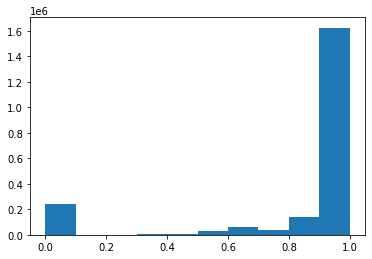

In [62]:
plt.hist(data_merge['unitsres'],bins = [0,0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])

In [63]:
bins = [0,0.5, 0.9,1]  
data_merge['unitsres']= np.where(data_merge["unitsres"] == 0, 0, pd.cut(data_merge['unitsres'], bins, right = True, include_lowest=False,labels =[1,2,3]))


In [64]:
data_merge['unitsres'].value_counts()

3.0    1608416
2.0     252402
0.0     241208
1.0      37247
Name: unitsres, dtype: int64

In [65]:
data_merge['unitsres'] = pd.Categorical(data_merge.unitsres)
data_merge['unitsres'] = data_merge['unitsres'].cat.rename_categories(["noresUnit","(0,0.5]ptcresUnit","(0.5,0.9]ptcresUnit","(0.9,1]ptcresUnit"])


In [66]:
data_merge['unitsres'].value_counts()

(0.9,1]ptcresUnit      1608416
(0.5,0.9]ptcresUnit     252402
noresUnit               241208
(0,0.5]ptcresUnit        37247
Name: unitsres, dtype: int64

# LOT FRONTAGE

In [67]:
data_merge["lotfront"].isnull().sum()

845

In [68]:
(data_merge["lotfront"]==0).sum()

6082

In [69]:
data_merge["lotfront"].max()

9999.0

<AxesSubplot:>

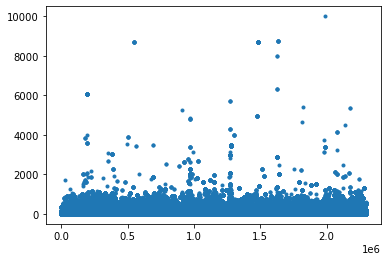

In [70]:
data_merge["lotfront"].plot(style='.')

<AxesSubplot:>

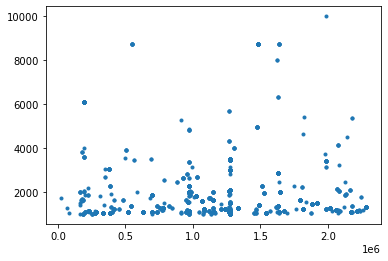

In [71]:
data_merge["lotfront"].loc[data_merge["lotfront"] >= 1000].plot(style='.')

<AxesSubplot:>

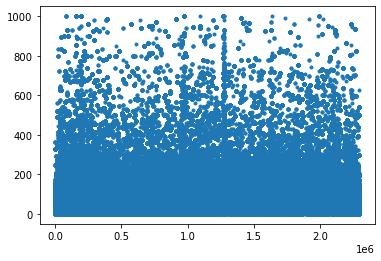

In [72]:
data_merge["lotfront"].loc[data_merge["lotfront"] < 1000].plot(style='.')

In [73]:
print("The quantile is \t", data_merge["lotfront"].loc[((data_merge["lotfront"] < 1000)  &  (data_merge["lotfront"] >0))].quantile(0.25) ,\
     '\t', data_merge["lotfront"].loc[((data_merge["lotfront"] < 1000)  &  (data_merge["lotfront"] >0))].quantile(0.50), \
     '\t', data_merge["lotfront"].loc[((data_merge["lotfront"] < 1000)  &  (data_merge["lotfront"] >0))].quantile(0.75))

The quantile is 	 20.33 	 25.0 	 52.67


In [74]:
bins = [0,20, 25,53,1000,10000]  
data_merge['lotfront']= np.where(data_merge["lotfront"] == 0, 0, pd.cut(data_merge['lotfront'], bins, right = True, include_lowest=False,labels =[1,2,3,4,5]))


In [75]:
data_merge['lotfront'].value_counts()

2.0    585540
3.0    572837
4.0    568913
1.0    557666
0.0      6082
5.0      2327
Name: lotfront, dtype: int64

In [76]:
data_merge['lotfront'] = pd.Categorical(data_merge.lotfront)
data_merge['lotfront'] = data_merge['lotfront'].cat.rename_categories(["0lotfront",\
"1lotfront",\
"2lotfront",\
"3lotfront",\
"4lotfront",\
"5lotfront"])


In [77]:
data_merge['lotfront'].value_counts()

2lotfront    585540
3lotfront    572837
4lotfront    568913
1lotfront    557666
0lotfront      6082
5lotfront      2327
Name: lotfront, dtype: int64

# PROXIMITY CODE

In [78]:
#data_merge["proxcode"]=df["proxcode"]

In [79]:
data_merge["proxcode"].isnull().sum()

845

In [80]:
data_merge["proxcode"].value_counts()

3.0    776470
0.0    761538
2.0    431655
1.0    323702
Name: proxcode, dtype: int64

In [81]:
(761538+845)/3516422

0.21680645838298135

In [82]:
data_merge.loc[(data_merge["proxcode"]==0), "proxcode"] = np.nan

In [83]:
data_merge['proxcode'] = pd.Categorical(data_merge.proxcode)
data_merge['proxcode'] = data_merge['proxcode'].cat.rename_categories(["Detached", "Semi-attached", "Attached"])


In [84]:
data_merge["proxcode"].value_counts()

Attached         776470
Semi-attached    431655
Detached         323702
Name: proxcode, dtype: int64

In [85]:
data_merge["proxcode"].isnull().sum()

762383

# LOT TYPE

In [86]:
#data_merge["lottype"] = df["lottype"]

In [87]:
data_merge["lottype"].isnull().sum()

845

In [88]:
data_merge.loc[(data_merge["lottype"]<1), "lottype"] = np.nan

In [89]:
data_merge["lottype"].value_counts()

5.0    1745596
3.0     465617
4.0      27723
1.0      15766
6.0       4872
8.0       2458
2.0       2266
9.0        748
7.0        426
Name: lottype, dtype: int64

In [90]:
data_merge['lottype'] = pd.Categorical(data_merge.lottype)
data_merge['lottype'] = data_merge['lottype'].cat.rename_categories(["BlockAssemblage",\
"Waterfront",\
"Corner",\
"Through",\
"Inside",\
"InteriorLot",\
"IslandLot",\
"AlleyLot",\
"SubmergedLandLot"])


In [91]:
data_merge["lottype"].value_counts()

Inside              1745596
Corner               465617
Through               27723
BlockAssemblage       15766
InteriorLot            4872
AlleyLot               2458
Waterfront             2266
SubmergedLandLot        748
IslandLot               426
Name: lottype, dtype: int64

# BASEMENT TYPE/GRADE

In [92]:
data_merge["bsmtcode"].isnull().sum()

845

In [93]:
data_merge["bsmtcode"].value_counts()

2.0    963819
0.0    489398
5.0    439512
1.0    389428
4.0      8611
3.0      2597
Name: bsmtcode, dtype: int64

In [94]:
#5 Unknown
data_merge.loc[(data_merge["bsmtcode"]>4), "bsmtcode"] = np.nan

In [95]:
data_merge["bsmtcode"].value_counts()

2.0    963819
0.0    489398
1.0    389428
4.0      8611
3.0      2597
Name: bsmtcode, dtype: int64

In [96]:
data_merge['bsmtcode'] = pd.Categorical(data_merge.bsmtcode)
data_merge['bsmtcode'] = data_merge['bsmtcode'].cat.rename_categories(["NoBasement","AboveGradeFullBasement","BelowGradeFullBasement", "AboveGradePartialBasement" ,"BelowGradePartialBasement"])



In [97]:
data_merge["bsmtcode"].value_counts()

BelowGradeFullBasement       963819
NoBasement                   489398
AboveGradeFullBasement       389428
BelowGradePartialBasement      8611
AboveGradePartialBasement      2597
Name: bsmtcode, dtype: int64

# Drop lotdepth

In [98]:
data_merge = data_merge.drop('lotdepth', axis=1)

# HISTORIC DISTRICT & LANDMARK

In [99]:
data_merge["histdist"].isnull().sum()

2041008

In [100]:
data_merge['histdist'] = data_merge['histdist'].astype('str')
data_merge['landmark'] = data_merge['landmark'].astype('str')
def label(df):
    if df['histdist']=="nan":
        return 0
    else:
        return 1
data_merge['histdist']=data_merge.apply(label,axis=1)
def label(df):
    if df['landmark']=="nan":
        return 0
    else:
        return 1
data_merge['landmark']=data_merge.apply(label,axis=1)
#data_merge.head()

In [101]:
data_merge['histdist'].value_counts()

0    2041008
1     253202
Name: histdist, dtype: int64

In [102]:
data_merge['landmark'].value_counts()

0    2276642
1      17568
Name: landmark, dtype: int64

In [103]:
data_merge['histdist'] = pd.Categorical(data_merge.histdist)
data_merge['histdist'] = data_merge['histdist'].cat.rename_categories(["Nohistdist","Containshistdist"])


In [104]:
data_merge['landmark'] = pd.Categorical(data_merge.landmark)
data_merge['landmark'] = data_merge['landmark'].cat.rename_categories(["Nolandmark","Containslandmark"])

In [105]:
data_merge['histdist'].value_counts()

Nohistdist          2041008
Containshistdist     253202
Name: histdist, dtype: int64

In [106]:
data_merge['landmark'].value_counts()

Nolandmark          2276642
Containslandmark      17568
Name: landmark, dtype: int64

In [107]:
def label(df):
    if df['yearalter2']!=0:
        return df['yearalter2']
    elif df['yearalter1']!=0:
        return df['yearalter1']
    else:
        return df['yearbuilt']
data_merge['yearbuilt']=data_merge.apply(label,axis=1)
data_merge = data_merge.drop('yearalter1', axis=1)
data_merge = data_merge.drop('yearalter2', axis=1)

In [108]:
data_merge.loc[(data_merge["yearbuilt"]==0), "yearbuilt"] = np.nan
data_merge["yearbuilt"].isnull().sum()

138135

In [109]:
def label(df):
    if df['yearbuilt']<1500:
        return 1
    elif df['yearbuilt']<1800:
        return 2
    elif df['yearbuilt']<1850:
        return 3
    elif df['yearbuilt']<1900:
        return 4
    elif df['yearbuilt']<1950:
        return 5
    elif df['yearbuilt']<2000:
        return 6
    elif df['yearbuilt']<2010:
        return 7
    elif df['yearbuilt']>=2010:
        return 8
    else:
        return df['yearbuilt']
data_merge['yearbuilt']=data_merge.apply(label,axis=1)

In [110]:
data_merge['yearbuilt'] = pd.Categorical(data_merge.yearbuilt)
data_merge['yearbuilt'] = data_merge['yearbuilt'].cat.rename_categories(["yearBuilt<1500",\
"yearBuilt<1800",\
"yearBuilt<1850",\
"yearBuilt<1900",\
"yearBuilt<1950",\
"yearBuilt<2000",\
"yearBuilt<2010",\
"yearBuilt>=2010"])

In [111]:
data_merge['yearbuilt'].value_counts()

yearBuilt<1950     957008
yearBuilt<2000     564179
yearBuilt<2010     245369
yearBuilt>=2010    227245
yearBuilt<1900     150574
yearBuilt<1850      11328
yearBuilt<1800        358
yearBuilt<1500         14
Name: yearbuilt, dtype: int64

In [112]:
#Assest tot

In [113]:
def label(df):
    if df['assesstot'] == 0:
        return 0
    if df['assesstot']<0.5*1e7:
        return 1
    elif df['assesstot']<1e7:
        return 2
    elif df['assesstot']<1.5*1e7:
        return 3
    elif df['assesstot']<2*1e7:
        return 4
    elif df['assesstot']<4*1e7:
        return 5
    elif df['assesstot']<1e8:
        return 6
    elif df['assesstot']<0.5*1e9:
        return 7
    elif df['assesstot']>=0.5*1e9:
        return 8
    else:
        return df['assesstot']
data_merge['assesstot']=data_merge.apply(label,axis=1)

In [114]:
data_merge.loc[(data_merge["assesstot"]==0), "assesstot"] = np.nan
data_merge["assesstot"].isnull().sum()

10934

In [115]:
data_merge['assesstot'] = pd.Categorical(data_merge.assesstot)
data_merge['assesstot'] = data_merge['assesstot'].cat.rename_categories(["assesstot_1",\
"assesstot_2",\
"assesstot_3",\
"assesstot_4",\
"assesstot_5",\
"assesstot_6",\
"assesstot_7",\
"assesstot_8"])


In [116]:
data_merge['assesstot'].value_counts()

assesstot_1    2144662
assesstot_2      59961
assesstot_3      25536
assesstot_5      22688
assesstot_4      13913
assesstot_6      12765
assesstot_7       3514
assesstot_8        237
Name: assesstot, dtype: int64

In [117]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294210 entries, 0 to 2294209
Data columns (total 42 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   Unnamed: 0                   int64   
 1   borough                      object  
 2   block                        int64   
 3   lot                          int64   
 4   bldgclass                    object  
 5   landuse                      category
 6   lotarea                      category
 7   numbldgs                     category
 8   numfloors                    category
 9   unitsres                     category
 10  unitstotal                   category
 11  lotfront                     category
 12  proxcode                     category
 13  lottype                      category
 14  bsmtcode                     category
 15  assesstot                    category
 16  yearbuilt                    category
 17  histdist                     category
 18  landmark              

In [118]:

data_merge = data_merge.drop("Unnamed: 0", axis=1)

In [119]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294210 entries, 0 to 2294209
Data columns (total 41 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   borough                      object  
 1   block                        int64   
 2   lot                          int64   
 3   bldgclass                    object  
 4   landuse                      category
 5   lotarea                      category
 6   numbldgs                     category
 7   numfloors                    category
 8   unitsres                     category
 9   unitstotal                   category
 10  lotfront                     category
 11  proxcode                     category
 12  lottype                      category
 13  bsmtcode                     category
 14  assesstot                    category
 15  yearbuilt                    category
 16  histdist                     category
 17  landmark                     category
 18  borocode              

In [120]:
data_merge.to_csv("./pluto_rodent_cat.csv")